In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics   
import io
import seaborn as sns


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()


%matplotlib inline

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
startups = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))

In [ ]:
print(startups.keys())
startups.isnull().sum()
startups.head()
#get_dummies converts categorical data like california & new york into numerical data in the form of an array
startups_clean = pd.get_dummies(startups, columns=["State"])

startups_clean.head()


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
startups_clean.describe()
#data exploration

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


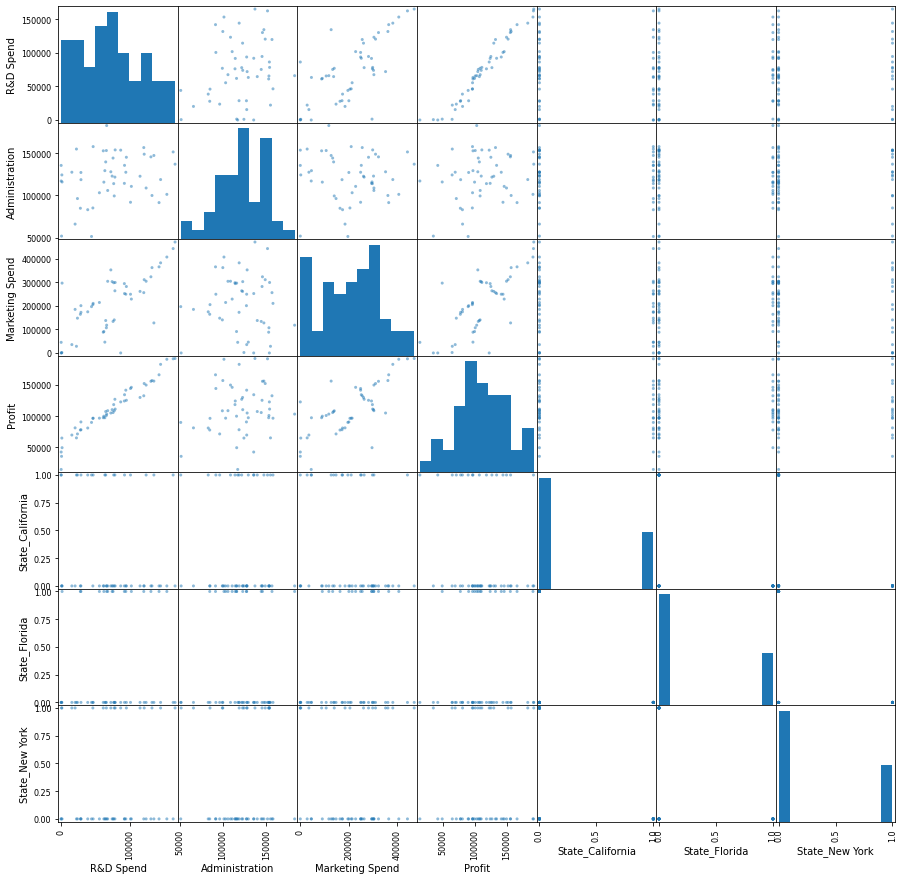

In [ ]:
tmp = pd.plotting.scatter_matrix(startups_clean, figsize=(15,15))

#the matrix lets us see how each variable relates to each other, 
#we can see there is a positive lineal relationship between R&D spent and profit
#as well a positive lineal relationship between R&D Spent and Marketing Spent
#that could mean when investing more R&D, profits should increase


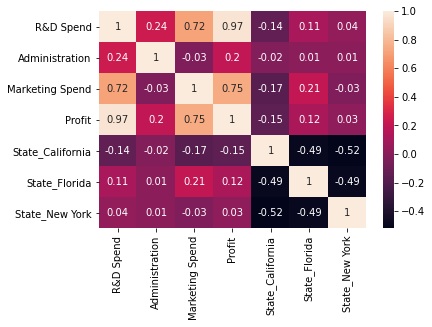

In [ ]:
correlation_matrix = startups_clean.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)
#Seeing numerically how each variable is related with each other
#funny it says if you're in the state of california you have a negative relationship with profits :)

In [ ]:
#we drop profits in the dependant variables as it is what want to calculate
x = startups_clean.drop(columns=['Profit']).values
y = startups_clean['Profit'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [ ]:
#linear regression
lineal_model = LinearRegression()
lineal_model.fit(x_train,y_train)

y_pred_lineal = lineal_model.predict(x_test)

In [ ]:
#decision tree
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

y_pred_dt = dt_model.predict(x_test)

#testing with a decision tree with a max depth of 3
dt1_model = DecisionTreeRegressor(max_depth=3)
dt1_model.fit(x_train,y_train)

y_pred_dt1 = dt1_model.predict(x_test)

In [ ]:
#random forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

y_pred_rf = rf_model.predict(x_test)


In [ ]:
#checking the calculated results of each model
df = pd.DataFrame({'Real Values':y_test, 'Predicted Profits with regression':y_pred_lineal, 'Predicted Profits with DT':y_pred_dt, 'Predicted Profits with DT max_depth = 3':y_pred_dt1,'Predicted Profits with RF':y_pred_rf})
df

,Real Values,Predicted Profits with regression,Predicted Profits with DT,Predicted Profits with DT max_depth = 3,Predicted Profits with RF
0,103282.38,103015.201598,105733.54,101134.796667,102931.1035
1,144259.40,132582.277608,141585.52,132756.586000,134023.7488
2,146121.95,132447.738452,141585.52,132756.586000,134818.0518
3,77798.83,71976.098513,78239.91,84975.750000,80759.3564
4,191050.39,178537.482211,182901.99,188985.293333,181774.6222
5,105008.31,116161.242302,101004.64,101134.796667,114242.2092
6,81229.06,67851.692097,71498.49,64174.926000,69851.8897
7,97483.56,98791.733747,99937.59,101134.796667,99094.2561
8,110352.25,113969.435330,108733.99,101134.796667,111567.9500
9,166187.94,167921.065696,182901.99,154167.592000,169240.9934


In [ ]:

#a function to calculate the errors
def errors(y_test, y_pred):
  mae = metrics.mean_absolute_error(y_test,y_pred)
  mse = metrics.mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  return mae, mse, rmse

def print_metrics(mae, mse, rmse):
  print("Mean Absolute Error      :\t{}".format(mae))
  print("Mean Squared Error       :\t{}".format(mse))
  print("Root Mean Squared Error  :\t{}".format(rmse))

mae, mse, rmse = errors(y_test, y_pred_lineal)
print("Error with Lineal Regression")
print_metrics(mae, mse, rmse)
print("Score")
print("Training Score =",lineal_model.score(x_train,y_train))
print("Testing Score = ",lineal_model.score(x_test,y_test))

mae, mse, rmse = errors(y_test, y_pred_dt)
print("Error with Decision Trees")
print_metrics(mae, mse, rmse)
print("Score")
print("Training Score =",dt_model.score(x_train,y_train))
print("Testing Score = ",dt_model.score(x_test,y_test))

mae, mse, rmse = errors(y_test, y_pred_dt1)
print("Error with  Decision Trees of Max Depth=3")
print_metrics(mae, mse, rmse)
print("Score")
print("Training Score =",dt1_model.score(x_train,y_train))
print("Testing Score = ",dt1_model.score(x_test,y_test))

mae, mse, rmse = errors(y_test, y_pred_rf)
print("Error with Random  Forest default")
print_metrics(mae, mse, rmse)
print("Score")
print("Training Score =",rf_model.score(x_train,y_train))
print("Testing Score = ",rf_model.score(x_test,y_test))





Error with Lineal Regression
Mean Absolute Error      :	7514.293659640602
Mean Squared Error       :	83502864.03257734
Root Mean Squared Error  :	9137.990152794942
Score
Training Score = 0.9501847627493607
Testing Score =  0.9347068473282425
Error with Decision Trees
Mean Absolute Error      :	5277.153000000001
Mean Squared Error       :	49904185.29361
Root Mean Squared Error  :	7064.289440107193
Score
Training Score = 1.0
Testing Score =  0.9609785649021075
Error with  Decision Trees of Max Depth=3
Mean Absolute Error      :	8207.44633333334
Mean Squared Error       :	91996193.70965421
Root Mean Squared Error  :	9591.464627972842
Score
Training Score = 0.9763919952920249
Testing Score =  0.9280656826481831
Error with Random  Forest default
Mean Absolute Error      :	6061.763910000026
Mean Squared Error       :	55557295.19788663
Root Mean Squared Error  :	7453.676622841014
Score
Training Score = 0.9863281592790349
Testing Score =  0.9565582450445017


In [ ]:
#testing with multiple RF
def forest(x_train, x_test, y_train, treenum):
  forests = RandomForestRegressor(n_estimators=treenum, random_state=0)
  forests.fit(x_train,y_train)
  y_pred = forests.predict(x_test)
  tscore = forests.score(x_train,y_train)
  tsscore = forests.score(x_test,y_test)
  return y_pred, tscore, tsscore

def forests_results(results):
  print('| Trees | MAE | MSE | RMSE | Training Score | Testing Score |')

  for key in results.keys():
    inf = results[key]
    print("| {} | {} | {} | {} | {} | {} |".format(key, inf[0], inf[1], inf[2], inf[3], inf[4]))

mintrees = 5
maxtrees = 2000
step = 100

results = {}

for trees in range(mintrees, maxtrees+step, step):
  y_pred,tscore,tsscore = forest(x_train,x_test,y_train,trees)
  results[trees] = list(errors(y_test,y_pred))
  results[trees].append(tscore)
  results[trees].append(tsscore)



In [ ]:
forests_results(results)

# Results

With Random forests we get the least error and highest score when it comes to calculating the profit value of the Start Up, when testing with Random Forest with 5 to 2000 estimators, the forest with a number of 105 estimators is the one with the least error and highest score of 0.97 for test set, both compared with a single Decision Tree with default depth (score of 0.96 for test set)  and Lineal Regression (score of 0.93 with test set), and Random Forests with more than 105 estimators (the higher the number goes, the score reduces from 0.966 to 0.965 for test set). So as result, for this case, the best model for calculating the profits of the start up will be a a Random forest with 105 estimators.

Review:
Your code is neat. And by neat I mean the steps are intact. All the libraries loaded in one place. EDA can be seen and also the assumption check. Good to see that you checked with all the models. And also the way you explained everything in the inference. Looking from the technical point of view I couldnt find any descrepecies. But remember no model is perfect, you can always try changing the percentage of test and train sets and be more sure of you model(only for practise sake). Full marks for the effort!
